In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\irene\Desktop\DataAnalytics\Bootcamp\Simulacro empresarial\ProjecteData\Equip_19\Data\tourist_accommodation_03112025_clean.csv")

# Serie por ciudades

## Crear dataframes por ciudad

In [9]:
ciudades_unicas = df['city'].unique()

dfs_por_ciudad = {}


for ciudad in ciudades_unicas:
    df_filtrado = df[df['city'] == ciudad].copy()
    dfs_por_ciudad[ciudad] = df_filtrado
    # print(f"-> DataFrame '{ciudad}' creado con {len(df_filtrado)} registros.")

# print("\nSegmentación completada.")

for ciudad in ciudades_unicas:
    nombre_variable = f"df_{ciudad}"
    
    df_filtrado = dfs_por_ciudad.get(ciudad, pd.DataFrame()).copy()

    if not df_filtrado.empty:
        globals()[nombre_variable] = df_filtrado
        print(f"-> Variable '{nombre_variable}' creada y accesible.")
    else:
        print(f"-> Advertencia: No se creó variable para '{ciudad}'. DataFrame vacío.")


-> Variable 'df_Málaga' creada y accesible.
-> Variable 'df_Madrid' creada y accesible.
-> Variable 'df_Sevilla' creada y accesible.
-> Variable 'df_Barcelona' creada y accesible.
-> Variable 'df_Girona' creada y accesible.
-> Variable 'df_Valencia' creada y accesible.
-> Variable 'df_Mallorca' creada y accesible.
-> Variable 'df_Menorca' creada y accesible.


## Crear corr por ciudad

In [16]:
# --- Definición de Variables Globales del Análisis ---
variable_objetivo = 'is_instant_bookable'
variables_predictoras = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
columnas_seleccionadas = [variable_objetivo] + variables_predictoras

# 1. Lista para almacenar los resultados de correlación de cada ciudad
resultados_correlacion = []


# 2. Bucle principal para iterar sobre el diccionario de DataFrames
for ciudad, df_ciudad in dfs_por_ciudad.items():
    
    if not df_ciudad.empty:
        
        # 2.1. Calcular la matriz de correlación para el subconjunto de columnas
        try:
            matriz_completa = df_ciudad[columnas_seleccionadas].corr()
            
            # 2.2. Extraer el vector de correlaciones de la variable objetivo
            correlaciones_relevantes = matriz_completa[variable_objetivo].drop(variable_objetivo)
            
            # 2.3. Preparar el resultado para el DataFrame resumen
            # Convertimos la Serie de pandas a diccionario para incluir el nombre de la ciudad
            resultado_dict = correlaciones_relevantes.to_dict()
            resultado_dict['Ciudad'] = ciudad
            
            # 2.4. Añadir a la lista de resultados
            resultados_correlacion.append(resultado_dict)
            
            print(f"-> Análisis completado para: {ciudad}")
            
        except Exception as e:
            print(f"-> ERROR en el análisis de {ciudad}: {e}")
            
    else:
        print(f"-> Advertencia: El DataFrame de {ciudad} está vacío y fue omitido.")


# 3. Crear el DataFrame final de resultados
df_resumen_correlacion = pd.DataFrame(resultados_correlacion)

# 4. Reordenar las columnas para una mejor presentación de negocio
columnas_ordenadas = ['Ciudad'] + variables_predictoras
df_resumen_correlacion = df_resumen_correlacion[columnas_ordenadas]

print("\n--- ✅ RESUMEN DE CORRELACIÓN POR CIUDAD ---")
df_resumen_correlacion


-> Análisis completado para: Málaga
-> Análisis completado para: Madrid
-> Análisis completado para: Sevilla
-> Análisis completado para: Barcelona
-> Análisis completado para: Girona
-> Análisis completado para: Valencia
-> Análisis completado para: Mallorca
-> Análisis completado para: Menorca

--- ✅ RESUMEN DE CORRELACIÓN POR CIUDAD ---


,Ciudad,availability_30,availability_60,availability_90,availability_365
0,Málaga,0.002609,0.014884,0.003788,0.026692
1,Madrid,0.013694,0.054783,0.072795,0.049513
2,Sevilla,0.068917,0.079950,0.078273,0.046058
3,Barcelona,-0.019930,0.000756,0.018185,0.051756
4,Girona,-0.129490,-0.141874,-0.160421,-0.236989
5,Valencia,-0.052572,-0.046707,-0.025317,-0.035171
6,Mallorca,0.001331,-0.004268,-0.011481,-0.028941
7,Menorca,-0.068769,-0.060329,-0.052293,-0.118232


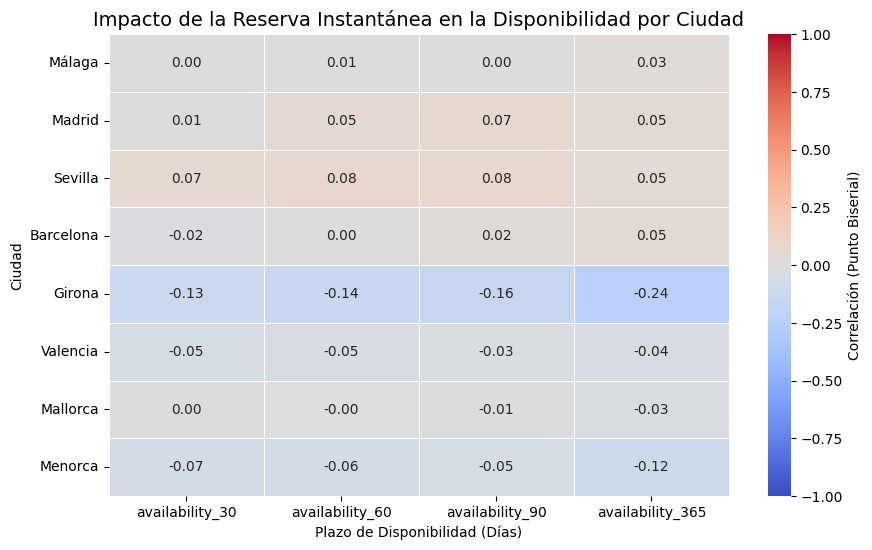

In [12]:
df_visualizacion = df_resumen_correlacion.set_index('Ciudad')

plt.figure(figsize=(10, 6)) 

sns.heatmap(
    df_visualizacion,
    annot=True,            
    cmap='coolwarm',
    vmin=-1, vmax=1,
    fmt=".2f",          
    linewidths=.5,         
    cbar_kws={'label': 'Correlación (Punto Biserial)'} 
)


plt.title('Impacto de la Reserva Instantánea en la Disponibilidad por Ciudad', fontsize=14)
plt.xlabel('Plazo de Disponibilidad (Días)')
plt.ylabel('Ciudad')
plt.yticks(rotation=0) 

plt.show()